In [1]:
# Carregando algumas bibliotecas importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
jogos = pd.read_csv('../data/processed/matches_FLA2024.csv', parse_dates=['kick-off'])
gols = pd.read_csv('../data/processed/goal_scorers_2024.csv')
stats = pd.read_csv('../data/processed/stats_FLA2024.csv', parse_dates=['kick-off'])

### Plotando Gráficos

#### Número de Gols por mês

In [3]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July']#, 
             #'August', 'September', 'October', 'November', 'December']

gols_feitos_total = stats.groupby(stats['kick-off'].dt.month_name())['gols_marcados'].sum().reindex(new_order, axis=0)
gols_sofridos_total = stats.groupby(stats['kick-off'].dt.month_name())['gols_sofridos'].sum().reindex(new_order, axis=0)
jogos_mes = stats.groupby(stats['kick-off'].dt.month_name())['jogos_cumulativos'].count().reindex(new_order, axis=0)

saldo = gols_feitos_total - gols_sofridos_total

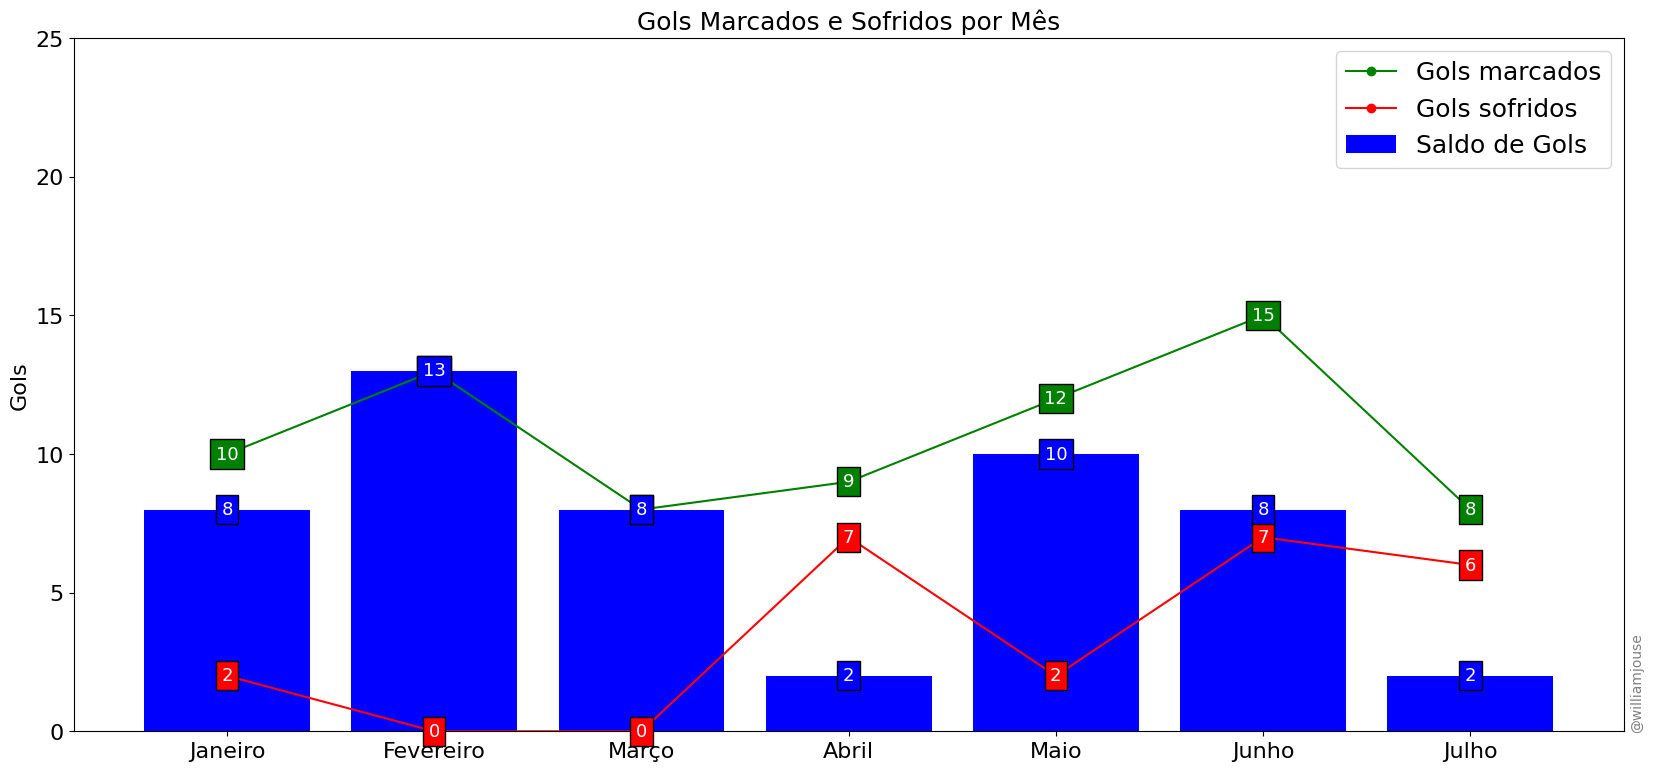

In [4]:
labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho']#, 
         # 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

fig, ax = plt.subplots(figsize=(20, 9))

cores = ['red' if saldo < 0 else 'blue' for saldo in saldo]

plt.title('Gols Marcados e Sofridos por Mês', fontsize=18)

plt.bar(saldo.index, saldo, align='center', label = 'Saldo de Gols', color=cores)

plt.plot(gols_feitos_total.index, gols_feitos_total, marker = 'o', c = 'green', label = 'Gols marcados')
plt.plot(gols_sofridos_total.index, gols_sofridos_total, marker = 'o', c = 'red', label = 'Gols sofridos')


for i in range(len(gols_feitos_total.index.to_list())):
    plt.text(gols_feitos_total.index.to_list()[i], gols_feitos_total.to_list()[i], 
             str(gols_feitos_total.to_list()[i]), color='white', ha='center', va='center', fontsize='13', 
             bbox=dict(facecolor='green', edgecolor='black'))
    plt.text(gols_feitos_total.index.to_list()[i], gols_sofridos_total.to_list()[i], 
             str(gols_sofridos_total.to_list()[i]), color='white', ha='center', va='center', fontsize='13',
             bbox=dict(facecolor='red', edgecolor='black'))
    plt.text(saldo.index.to_list()[i], saldo.to_list()[i], str(saldo.to_list()[i]), color='white', fontsize='13', 
             ha='center', va='center', bbox=dict(facecolor=cores[i], edgecolor='black'))
    


plt.ylim(0, 25)
plt.ylabel('Gols', fontsize=16)
plt.xticks(gols_feitos_total.index, labels, fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=18)

plt.figtext(.91, 0.22, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('figures/figure.png', dpi = 300, bbox_inches='tight')
 
plt.show()

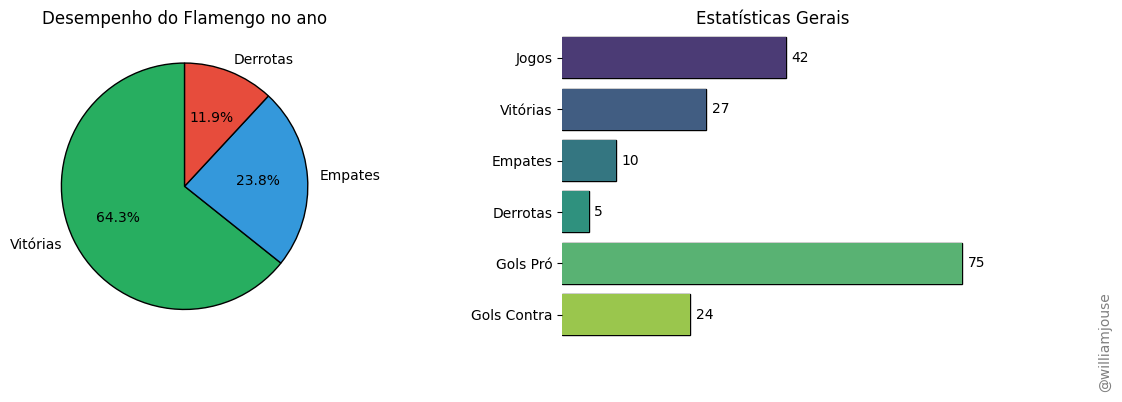

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))

vitorias = stats.resultado.value_counts()[0]
empates = stats.resultado.value_counts()[1]
derrotas = stats.resultado.value_counts()[2]

gols_pro = stats.gols_marcados.sum()
gols_contra = stats.gols_sofridos.sum()

total_jogos = vitorias + empates + derrotas

axs[0].pie([vitorias, empates, derrotas], labels=['Vitórias', 'Empates', 'Derrotas'], 
           autopct='%1.1f%%', startangle=90, colors=['#27AE60', '#3498DB', '#E74C3C'], wedgeprops={'edgecolor': 'black'})

axs[0].set_title('Desempenho do Flamengo no ano')

labels = ['Jogos', 'Vitórias', 'Empates', 'Derrotas', 'Gols Pró', 'Gols Contra']
values = [total_jogos, vitorias, empates, derrotas, gols_pro, gols_contra]
         
axs[1].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')

for i, value in enumerate(values):
    axs[1].text(value + 1, i, str(value), va='center')
    
import seaborn as sns    
sns.barplot(x=values, y=labels, ax=axs[1], palette='viridis')

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])


axs[1].set_title('Estatísticas Gerais')


plt.subplots_adjust(wspace=0.4)

plt.figtext(1.0, 0.23, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.savefig('figures/figure2.png', dpi = 300, bbox_inches='tight')


plt.show()

In [6]:
jogos['Mês'] = jogos['kick-off'].dt.month_name()

agrupado = jogos.groupby(['Mês', 'resultado']).size().unstack().reindex(new_order, axis=0)


vic = agrupado['Vitória'].fillna(0).astype('Int64').to_list()
emp = agrupado['Empate'].fillna(0).astype('Int64').to_list()
der = agrupado['Derrota'].fillna(0).astype('Int64').to_list()
months = agrupado.index.to_list()

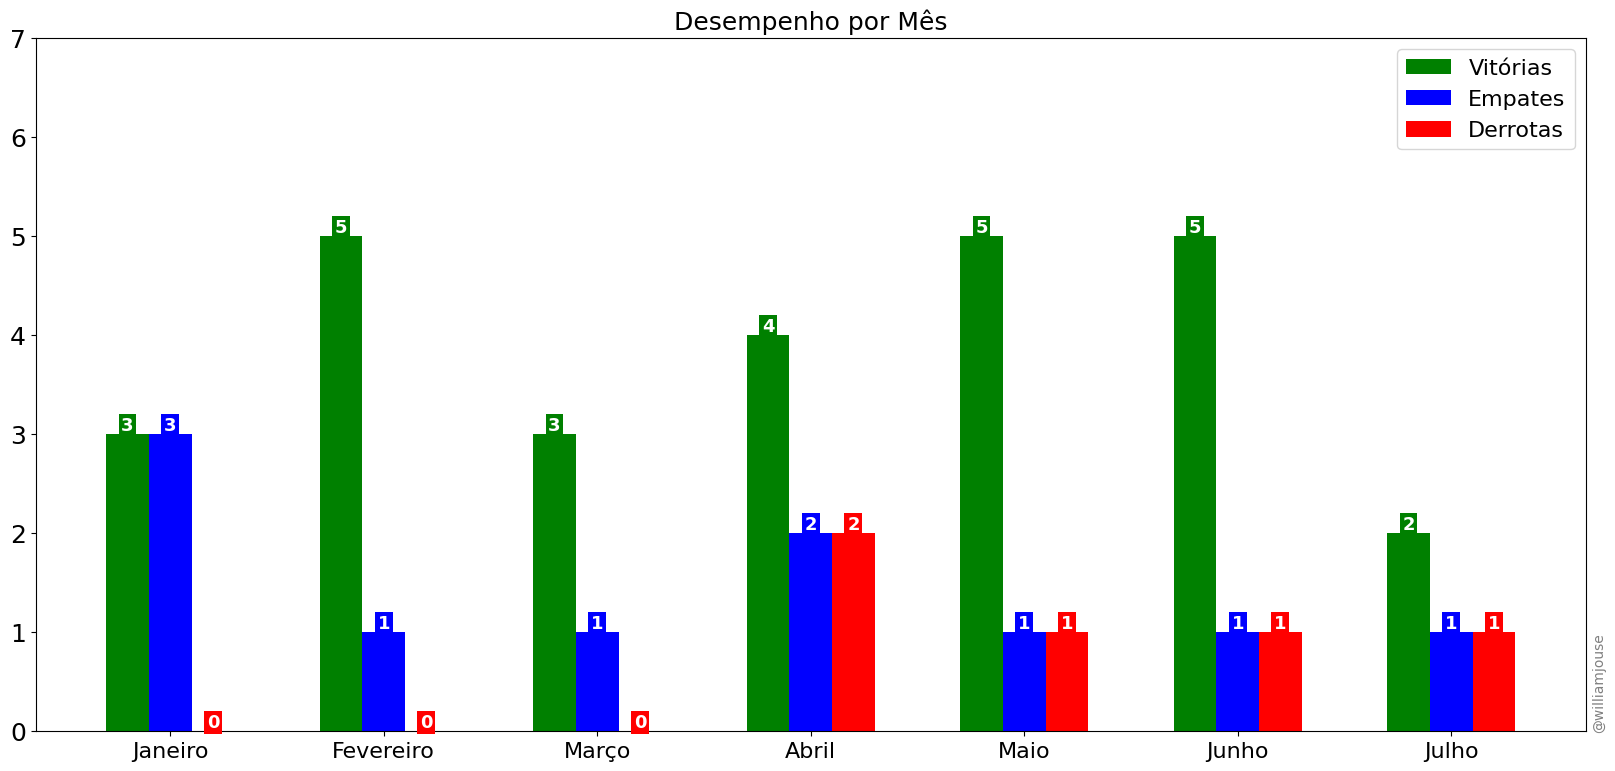

In [7]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho']# 
         #, 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

x = range(len(months))
largura_barra = 0.2

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Desempenho por Mês', fontsize=18)

plt.bar(x, vic, width=largura_barra, label='Vitórias', color='green')
plt.bar([i + largura_barra for i in x], emp, width=largura_barra, label='Empates', color='blue')
plt.bar([i + 2 * largura_barra for i in x], der, width=largura_barra, label='Derrotas', color='red')


for i, v in enumerate(vic):
    plt.text(i, v, str(v), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='green', edgecolor='none', pad=2))
for i, e in enumerate(emp):
    plt.text(i + largura_barra, e, str(e), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='blue', edgecolor='none', pad=2))
for i, d in enumerate(der):
    plt.text(i + 2 * largura_barra, d, str(d), ha='center', va='bottom', color='white', fontweight='bold', fontsize='13',
             bbox=dict(facecolor='red', edgecolor='none', pad=2))

plt.xticks([i + largura_barra for i in x], meses, fontsize=16)

plt.yticks(fontsize=18)
plt.ylim(0, max(vic + emp + der) + 2)

# Adicionando uma legenda
green_patch = mpatches.Patch(color='green', label='Vitórias')
blue_patch = mpatches.Patch(color='blue', label='Empates')
red_patch = mpatches.Patch(color='red', label='Derrotas')
plt.legend(handles=[green_patch, blue_patch, red_patch], fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=16)

plt.figtext(.91, 0.22, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.legend(loc='upper right', fontsize=16)

plt.savefig('figures/figure3.png', dpi = 300, bbox_inches='tight')

plt.show()

In [8]:
stats_copy = stats.copy()


Tite_time = stats_copy.loc[(stats_copy['kick-off'] >= pd.to_datetime('2024-01-01'))] 

Tite_jogos = Tite_time.copy()

Tite_jogos = Tite_jogos.reset_index(drop=True)

Tite_jogos['jogos_cumulativos'] = range(1, len(Tite_jogos) + 1)

Tite_jogos['gols_marcados_acumulados'] = Tite_jogos['gols_marcados'].cumsum()
Tite_jogos['gols_sofridos_acumulados'] = Tite_jogos['gols_sofridos'].cumsum()
Tite_jogos['diferença_gols_acumulados'] = Tite_jogos['gols_marcados_acumulados'] - Tite_jogos['gols_sofridos_acumulados']


def obter_aproveitamento(row):
    if row == 'Vitória':
        return 3
    elif row == 'Empate':
        return 1
    else:
        return 0

Tite_jogos['pontos'] = Tite_jogos['resultado'].apply(obter_aproveitamento)

Tite_jogos['aproveitamento_acumulado'] = Tite_jogos['pontos'].cumsum()

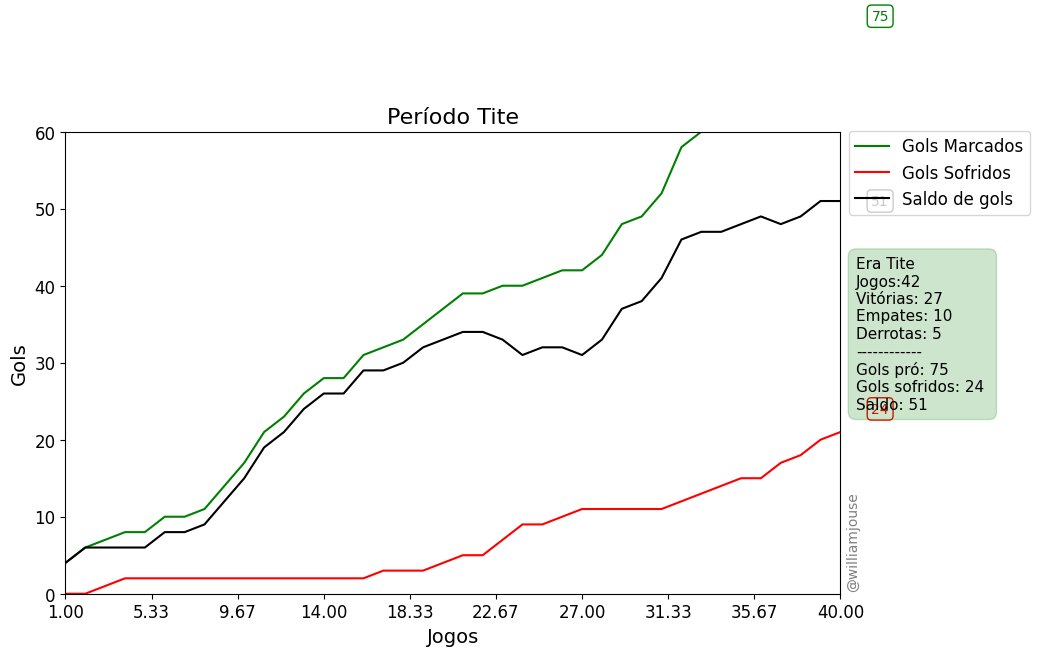

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Período Tite', fontsize=16)

plt.plot(Tite_jogos['jogos_cumulativos'], Tite_jogos.gols_marcados.cumsum(), label='Gols Marcados', color='green')
plt.plot(Tite_jogos['jogos_cumulativos'], Tite_jogos.gols_sofridos.cumsum(), label='Gols Sofridos', color='red')
plt.plot(Tite_jogos['jogos_cumulativos'], Tite_jogos.gols_marcados.cumsum() - Tite_jogos.gols_sofridos.cumsum(), label='Saldo de gols', color='black')

plt.ylim(0, 60)
plt.xlim(1, 40)

plt.ylabel('Gols', fontsize=14)
plt.yticks(fontsize=12)

plt.xlabel('Jogos', fontsize=14)
plt.xticks(np.linspace(1, 40, 10), fontsize=12)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=14)


plt.text(len(Tite_jogos.gols_marcados.cumsum()), Tite_jogos.gols_marcados.cumsum().iloc[-1], f'{Tite_jogos.gols_marcados.cumsum().iloc[-1]}',
         ha='center', va='center', color='green', bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'),
         fontsize=10)

plt.text(len(Tite_jogos.gols_sofridos.cumsum()), Tite_jogos.gols_sofridos.cumsum().iloc[-1], f'{Tite_jogos.gols_sofridos.cumsum().iloc[-1]}',
         ha='center', va='center', color='red', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'),
         fontsize=10)


plt.text(len(Tite_jogos.gols_marcados.cumsum()), (Tite_jogos.gols_marcados.cumsum() - Tite_jogos.gols_sofridos.cumsum()).iloc[-1],
         f'{(Tite_jogos.gols_marcados.cumsum() - Tite_jogos.gols_sofridos.cumsum()).iloc[-1]}',
         ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
         fontsize=10)

Tite_stats = '''Era Tite
Jogos:{0}
Vitórias: {1} 
Empates: {2} 
Derrotas: {3} 
------------
Gols pró: {4}
Gols sofridos: {5} 
Saldo: {6} '''.format(Tite_jogos.shape[0],
                        Tite_jogos['resultado'].value_counts()[0], 
                        Tite_jogos['resultado'].value_counts()[1], 
                        Tite_jogos['resultado'].value_counts()[2],
                        Tite_jogos['gols_marcados'].sum(), 
                        Tite_jogos['gols_sofridos'].sum(), 
                        Tite_jogos['gols_marcados'].sum() - Tite_time['gols_sofridos'].sum())


plt.text(1.02, 0.40, Tite_stats, transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(facecolor='g', edgecolor='g', alpha=.2, boxstyle='round, pad=0.5'))

plt.figtext(.92, 0.28, '@williamjouse', ha='right', va='top', alpha=0.5, fontsize=10, rotation=90)

plt.legend(bbox_to_anchor=(1.0, 1.02), loc='upper left', fontsize=12)


plt.savefig('figures/figure7.jpg', dpi = 300, bbox_inches='tight')


plt.show()

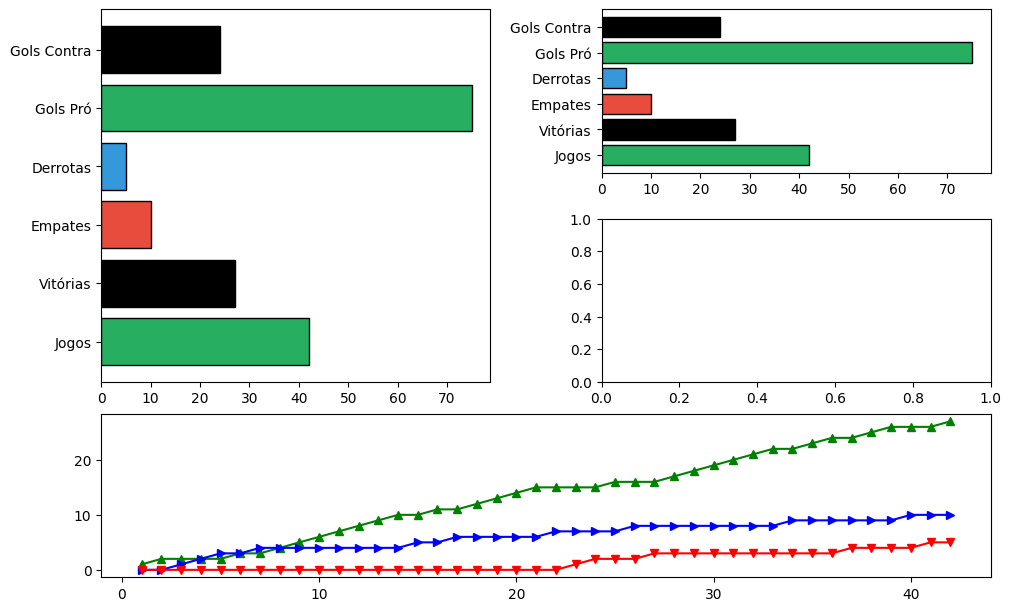

In [10]:
stats['Vitórias_cumulativas'] = (stats['resultado'] == 'Vitória').cumsum()
stats['Empates_cumulativas'] = (stats['resultado'] == 'Empate').cumsum()
stats['Derrotas_cumulativas'] = (stats['resultado'] == 'Derrota').cumsum()

fig = plt.figure(constrained_layout=True, figsize=(10,6))
mosaic = fig.subplot_mosaic('''
                     AB
                     AC
                     DD''')

mosaic['A'].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')

mosaic['B'].barh(labels, values, color=['#27AE60', 'black', '#E74C3C', '#3498DB'], edgecolor='black')


mosaic['D'].plot(stats['jogos_cumulativos'], stats['Vitórias_cumulativas'], label='Vitórias', color='green', marker="^")
mosaic['D'].plot(stats['jogos_cumulativos'], stats['Empates_cumulativas'], label='Empate', color='blue', marker=">")
mosaic['D'].plot(stats['jogos_cumulativos'], stats['Derrotas_cumulativas'], label='Derrotas', color='red', marker="v")

In [11]:
values

[42, 27, 10, 5, 75, 24]